In [56]:
import csv
data = open('mnist_train.csv')
csv_file = csv.reader(data)
data_points = []
i = 0;
for row in csv_file:
    i+=1;
    data_points.append(row)
    if (i>1000):
        break;
    

In [57]:
#On enlève la première ligne, soit les "headers" de nos colonnes
data_points.pop(0)

data.close()

for i in range(len(data_points)):
    for j in range(0,785):
            data_points[i][j] = int(data_points[i][j])

y_train = []

for row in data_points:
    y_train.append(row[0])

x_train = []

for row in data_points:
    x_train.append(row[1:785])


In [58]:
for i in range(len(x_train)):
    for j in range(len(x_train[0])):
        if x_train[i][j] != 0 :
            #Nous devons diviser par 255.0 et non 255 pour convertir ces int en float
            x_train[i][j] = round(int(x_train[i][j]) / 255.0)

In [20]:
n_train = 3000
def dct(x):
    return fftpack.dct(x.reshape((n_train, 28, 28)), axis=0, norm="ortho").reshape((n_train, 28**2))

mnist_train_dct = dct(x_train[:n_train, 1:])

TypeError: list indices must be integers or slices, not tuple

In [51]:
#http://scikit-learn.org/stable/auto_examples/manifold/plot_lle_digits.html

F:\anaconda\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


Computing Isomap embedding
Done.


In [52]:
#http://scikit-learn.org/stable/auto_examples/manifold/plot_compare_methods.html
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter
n_points = 1000
X, color = datasets.samples_generator.make_s_curve(n_points, random_state=0)
n_neighbors = 10
n_components = 2
fig = plt.figure(figsize=(15, 8))
plt.suptitle("Manifold Learning with %i points, %i neighbors"
             % (1000, n_neighbors), fontsize=14)

ax = fig.add_subplot(251, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax.view_init(4, -72)

t0 = time()
Y = manifold.Isomap(n_neighbors, n_components=2).fit_transform(x_train)
t1 = time()
print("Isomap: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(257)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("Isomap (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')


Isomap: 1.9 sec


(-31.08087125247808, 24.75843446182218, -23.75353606804342, 26.968256174460638)

[[ 3.7938749   4.00236893]
 [18.17613329 -8.00492974]
 [-3.49656049 -7.07850818]
 ...
 [ 7.14131488  0.2731641 ]
 [ 9.0838869   6.249411  ]
 [-0.62066466  3.91485468]]
[3.7938749  4.00236893]


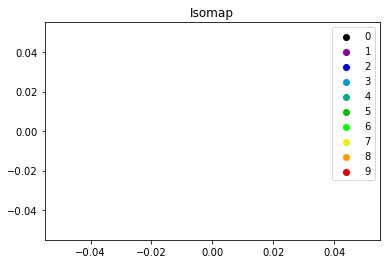

In [60]:
#https://qiita.com/sotetsuk/items/0c9ffb2a891294d314f3
from sklearn.manifold import Isomap
import matplotlib.pyplot as plt
isomap = Isomap(n_neighbors=30, n_components=2)
X_iso = isomap.fit(x_train).transform(x_train)
colors = [plt.cm.nipy_spectral(i/10., 1) for i in range(10)]

target_names = [0,1,2,3,4,5,6,7,8,9]

print (X_iso)
print (X_iso[0])
## plot
plt.figure()
for c,target_name in zip(colors, target_names):
   plt.scatter(X_iso[y_train == target_name, 0], X_iso[y_train == target_name, 1], c=c, label = target_name)
plt.legend()
plt.title('Isomap')
plt.show()

In [22]:
#http://scikit-learn.org/stable/tutorial/statistical_inference/unsupervised_learning.html
from sklearn import decomposition
pca = decomposition.PCA()
pca.fit(x_train)
PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)
print(pca.explained_variance_)  

NameError: name 'PCA' is not defined

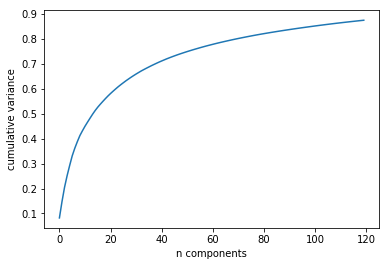

Reconstruction error : 32.99515891650189


In [94]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
model = PCA(n_components=120,svd_solver='randomized').fit(x_train)
plt.plot(np.cumsum(model.explained_variance_ratio_))
plt.xlabel('n components')
plt.ylabel('cumulative variance');
plt.show()

from sklearn.manifold import Isomap
embedding = Isomap(n_neighbors=10,n_components=52)
X_transformed = embedding.fit_transform(x_train[:100])
print ("Reconstruction error : " + str(embedding.reconstruction_error()))

#n_neighbors = 10
#Y = Isomap(n_neighbors, n_components=2).fit_transform(x_train)
#print ("Reconstruction error : " + str(Y.reconstruction_error()))

#https://www.researchgate.net/publication/223824802_Selection_of_the_optimal_parameter_value_for_the_Isomap_algorithm

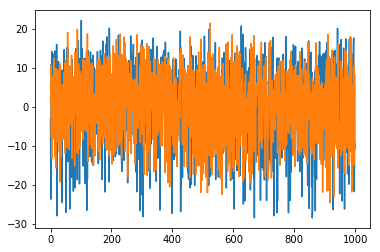

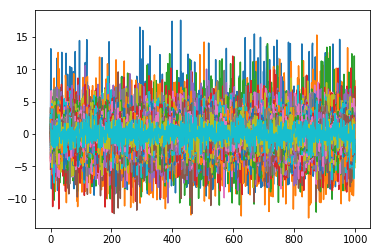

In [79]:
import numpy as np
 
import matplotlib.pyplot as plt
 
from sklearn import manifold
from time import time

ISOMAP_DATA= manifold.Isomap(n_neighbors=10, n_components=2).fit_transform(x_train)
plt.plot(ISOMAP_DATA)
plt.show()

ISOMAP_DATA= manifold.Isomap(n_neighbors=99, n_components=80).fit_transform(x_train)
plt.plot(ISOMAP_DATA)
plt.show()

In [ ]:
http://benalexkeen.com/isomap-for-dimensionality-reduction-in-python/
https://jakevdp.github.io/PythonDataScienceHandbook/05.10-manifold-learning.html
http://scikit-learn.org/stable/modules/generated/sklearn.manifold.Isomap.html
http://scikit-learn.org/stable/tutorial/statistical_inference/putting_together.html

In [ ]:
#PCA https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html